In [1]:
import numpy as np
import os
from PIL import Image
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
path2train_images = Path("/scratch/scratch6/akansh12/ravir_data/RAVIR Dataset/train/training_images/")
path2train_mask = Path("/scratch/scratch6/akansh12/ravir_data/RAVIR Dataset/train/training_masks/")
path2test_images = Path("/scratch/scratch6/akansh12/ravir_data/RAVIR Dataset/test/")

In [3]:
print("Number of train Images:", len(os.listdir(path2train_images)))
print("Number of test Images:", len(os.listdir(path2test_images)))
assert len(os.listdir(path2train_images)) == len(os.listdir(path2train_mask))

Number of train Images: 23
Number of test Images: 19


In [4]:
train_images = sorted(os.listdir(path2train_images))
train_mask = sorted(os.listdir(path2train_mask))

In [5]:
img_1 = path2train_images/train_images[0]
mask_1 = path2train_mask/train_mask[0]

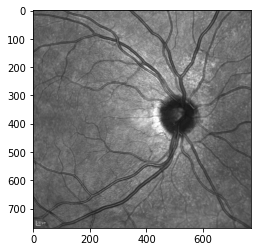

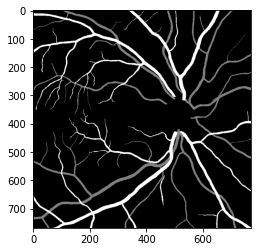

In [6]:
plt.imshow(plt.imread(img_1), cmap = "gray")
plt.show()
plt.imshow(plt.imread(mask_1), cmap = "gray")

In [7]:
#img_1
print("MAX pixel values: ", np.max(np.array(Image.open(img_1))))
print("MIN pixel values: ", np.min(np.array(Image.open(img_1))))

MAX pixel values:  255
MIN pixel values:  0


In [8]:
#mask_1
print("MAX pixel values: ", np.max(np.array(Image.open(mask_1))))
print("MIN pixel values: ", np.min(np.array(Image.open(mask_1))))
print("unique values in the masks:", np.unique(np.array(Image.open(mask_1))))

MAX pixel values:  255
MIN pixel values:  0
unique values in the masks: [  0 128 255]


#### Artery and vein classes have labels of 128 and 256 respectively. Background have a label of 0.

In [11]:
mask_1_array = np.array(Image.open(mask_1))

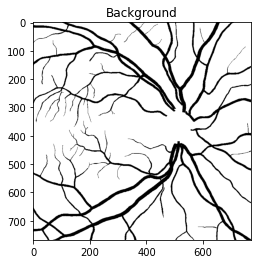

In [16]:
plt.imshow(mask_1_array == 0, cmap = 'gray')
plt.title("Background");

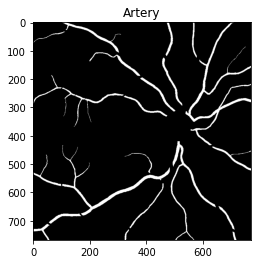

In [17]:
plt.imshow(mask_1_array == 128, cmap = 'gray')
plt.title("Artery");

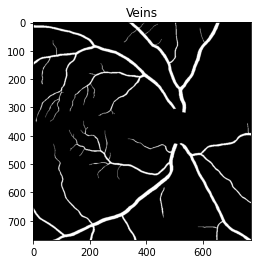

In [19]:
plt.imshow(mask_1_array == 255, cmap = 'gray')
plt.title("Veins");

### Normalization

In [79]:
np.array(Image.open(img_1))

array([[102,  81,  82, ...,  90, 106,  93],
       [ 76,  69,  83, ...,  76,  65,  65],
       [ 92,  83,  81, ...,  85,  78,  79],
       ...,
       [ 63,  64,  61, ...,  50,  51,  57],
       [ 72,  69,  69, ...,  53,  48,  50],
       [ 68,  65,  65, ...,  60,  44,  48]], dtype=uint8)

### Preprocessing

In [59]:
path2save = Path("/scratch/scratch6/akansh12/ravir_data/ravir/data/training_images_masks/")
path2save.mkdir(exist_ok=True)
for i in train_mask:
    path2img = path2train_mask/i
    mask = np.array(Image.open(path2img))
    new_mask = np.zeros((768,768,3))
    new_mask[:,:,0] = (mask == 0).astype('uint8')
    new_mask[:,:,1] = (mask == 128).astype('uint8')
    new_mask[:,:,2] = (mask == 255).astype('uint8')
    np.save(path2save/i,new_mask)

In [63]:
os.listdir(path2save)

['IR_Case_040.png.npy',
 'IR_Case_017.png.npy',
 'IR_Case_056.png.npy',
 'IR_Case_044.png.npy',
 'IR_Case_049.png.npy',
 'IR_Case_034.png.npy',
 'IR_Case_026.png.npy',
 'IR_Case_055.png.npy',
 'IR_Case_019.png.npy',
 'IR_Case_052.png.npy',
 'IR_Case_058.png.npy',
 'IR_Case_036.png.npy',
 'IR_Case_021.png.npy',
 'IR_Case_023.png.npy',
 'IR_Case_035.png.npy',
 'IR_Case_020.png.npy',
 'IR_Case_053.png.npy',
 'IR_Case_011.png.npy',
 'IR_Case_022.png.npy',
 'IR_Case_051.png.npy',
 'IR_Case_041.png.npy',
 'IR_Case_043.png.npy',
 'IR_Case_038.png.npy']

In [73]:
a = np.load("/scratch/scratch6/akansh12/ravir_data/ravir/data/training_images_masks/IR_Case_020.png.npy").astype('uint8')

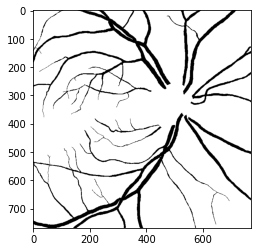

In [75]:
plt.imshow(a[:,:,0], cmap = 'gray')

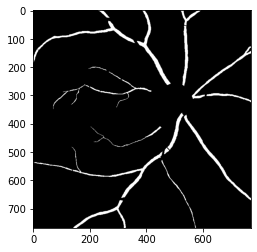

In [77]:
plt.imshow(a[:,:,1], cmap = 'gray')

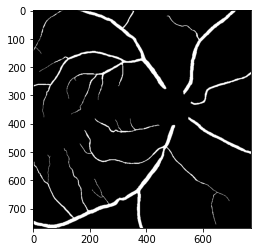

In [76]:
plt.imshow(a[:,:,2], cmap = 'gray')